In [1]:
################################
# Import private python module
################################
from DataSource import DataSource

/Users/bwang/Desktop/py/HouseRent/html2text.py:95: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if c is not ' ' and c is not '  ':
/Users/bwang/Desktop/py/HouseRent/html2text.py:95: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if c is not ' ' and c is not '  ':
/Users/bwang/Desktop/py/HouseRent/html2text.py:96: SyntaxWarning: "is" with a literal. Did you mean "=="?
  return c is ' '


In [2]:
################################
# Get data from private python module/methods
################################
source = DataSource()
source.to_csv("data", "rent.csv")

In [3]:
import pandas as pd
df = pd.read_csv('data/rent.csv')

In [4]:
df.head()

,Id,Bedrooms,Bathrooms,Address,Rent,RentPerRoom,ListedDate,Suburb
0,3146431275,1.0,1.0,"10/27 Cheshire Street, Parnell, Auckland City",515.0,515.000000,"Tue, 22 Jun",parnell
1,3181266135,1.0,1.0,"12/7 Claybrook Road, Parnell, Auckland City",320.0,320.000000,Yesterday,parnell
2,3164725627,6.0,2.0,"37 Birdwood Ct, Parnell, Auckland City",1450.0,241.666667,"Mon, 5 Jul",parnell
3,3178437180,2.0,1.0,"1-12 Earle street, Parnell, Auckland City",595.0,297.500000,"Thu, 15 Jul",parnell
4,3177395014,1.0,1.0,"206/10 Ronayne, Parnell, Auckland City",575.0,575.000000,"Wed, 14 Jul",parnell


In [5]:
################################
# Data pre-processing: 
# get mean, and append some mock data
################################

suburbVsRentPerRoomMean = df[['Suburb', 'RentPerRoom']].groupby(['Suburb'], as_index = False).mean()
suburbVsRentPerRoomMean = suburbVsRentPerRoomMean.append({'Suburb':'remuera', 'RentPerRoom':260.00}, ignore_index=True)
suburbVsRentPerRoomMean = suburbVsRentPerRoomMean.append({'Suburb':'kohimarama', 'RentPerRoom':310.00}, ignore_index=True)
suburbVsRentPerRoomMean = suburbVsRentPerRoomMean.append({'Suburb':'tamaki', 'RentPerRoom':340.00}, ignore_index=True)
suburbVsRentPerRoomMean.head()

,Suburb,RentPerRoom
0,parnell,429.431818
1,remuera,260.000000
2,kohimarama,310.000000
3,tamaki,340.000000


In [6]:
import geopandas

In [7]:
#########################
# Get shapefile of the world map from GeoPandas buildin dataset
#########################
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# world.head()

#########################
# Show the map
#########################
# import matplotlib.pyplot as plt
# world.plot()
# plt.show()

#########################
# Plotting Choropleth map with the feature 'pop_est'
#########################
# fig, ax = plt.subplots(1, 1)
# world.plot(column= 'pop_est', ax=ax, legend=True)
# plt.show()

#########################
# Plotting Choropleth map with the feature 'gdp_md_est'
#########################
# world.plot(column='gdp_md_est', cmap='OrRd')
# plt.show()

In [8]:
################################
# GeoPandas to read shape file
################################
import geopandas as gpd

pd.set_option('display.max_columns', None) #显示所有列
pd.set_option('display.max_rows', None) #显示所有行
pd.set_option('max_colwidth',80) #设置value的显示长度为100，默认为50

nz_postcode_boundaries = gpd.read_file('data/nz-post-postcode-boundaries-SHP/nz-post-postcode-boundaries-june-2011-licensed-only-for-m.shp')
nz_postcode_boundaries.head()

# nz_postcode_boundaries = gpd.read_file('Auckland_Council_Boards-shp/AucklandCouncil_Board.shp')
# nz_postcode_boundaries = nz_postcode_boundaries.to_crs({'init': 'espg:4326'})
# nz_postcode_boundaries.head()

# gdf = gpd.read_file('kx-nz-post-postcode-boundaries-SHP/nz-post-postcode-boundaries-june-2011-licensed-only-for-m.shp')    
# with open("kx-nz-post-postcode-boundaries-SHP/nz-post-postcode-boundaries-june-2011-licensed-only-for-m.prj") as prj_file:
#     crs = prj_file.read()
# gdf.crs = crs
# gdf2 = gdf.to_crs('epsg:4326')

# CRSError: Invalid projection: espg:4326: (Internal Proj Error: proj_create: crs not found)

,POSTCODE,ROUND_NAME,MAIL_TOWN,geometry
0,5024,None,None,"POLYGON ((1754504.479 5443075.549, 1754529.142 5443094.765, 1754523.313 5443..."
1,4191,RD 1 WAIROA,WAIROA,"POLYGON ((1957084.869 5681201.319, 1957088.159 5681203.619, 1957091.334 5681..."
2,4197,RD 2 WAIROA,WAIROA,"POLYGON ((1977584.467 5672301.730, 1977587.369 5672298.831, 1977606.227 5672..."
3,4082,RD 2 RUATORIA,RUATORIA,"POLYGON ((2065756.397 5792649.214, 2065772.675 5792786.376, 2065826.429 5792..."
4,4083,RD 3 RUATORIA,RUATORIA,"POLYGON ((2069192.614 5798915.279, 2069230.231 5798677.527, 2070027.514 5798..."


In [9]:
################################
# Data pre-process: 
################################
auckland_post_code = ['1052', '1050', '1071', '1072']
auckland3 = nz_postcode_boundaries[nz_postcode_boundaries['POSTCODE'].isin(auckland_post_code)]
auckland3

,POSTCODE,ROUND_NAME,MAIL_TOWN,geometry
131,1071,None,None,"POLYGON ((1768203.160 5917448.262, 1768087.372 5917555.470, 1768057.497 5917..."
702,1050,None,None,"POLYGON ((1763138.678 5917133.816, 1763120.413 5917123.448, 1763101.275 5917..."
707,1072,None,None,"POLYGON ((1762187.355 5918537.880, 1762189.523 5918536.130, 1762209.536 5918..."
881,1052,None,None,"POLYGON ((1758603.826 5920346.432, 1758604.016 5920346.502, 1758609.920 5920..."


In [10]:
################################
# Data pre-process: add the missing suburb name for POSTCODE
################################

auckland3.loc[auckland3.POSTCODE=='1052','ROUND_NAME'] = 'parnell'
auckland3.loc[auckland3.POSTCODE=='1050','ROUND_NAME'] = 'remuera'
auckland3.loc[auckland3.POSTCODE=='1071','ROUND_NAME'] = 'kohimarama'
auckland3.loc[auckland3.POSTCODE=='1072','ROUND_NAME'] = 'tamaki'

auckland3

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,POSTCODE,ROUND_NAME,MAIL_TOWN,geometry
131,1071,kohimarama,None,"POLYGON ((1768203.160 5917448.262, 1768087.372 5917555.470, 1768057.497 5917..."
702,1050,remuera,None,"POLYGON ((1763138.678 5917133.816, 1763120.413 5917123.448, 1763101.275 5917..."
707,1072,tamaki,None,"POLYGON ((1762187.355 5918537.880, 1762189.523 5918536.130, 1762209.536 5918..."
881,1052,parnell,None,"POLYGON ((1758603.826 5920346.432, 1758604.016 5920346.502, 1758609.920 5920..."


In [11]:
################################
# Just a test - check ROUND_NAME in original `nz_postcode_boundaries` not changed
################################
test = nz_postcode_boundaries.loc[nz_postcode_boundaries.POSTCODE=='1050']
test

,POSTCODE,ROUND_NAME,MAIL_TOWN,geometry
702,1050,None,None,"POLYGON ((1763138.678 5917133.816, 1763120.413 5917123.448, 1763101.275 5917..."


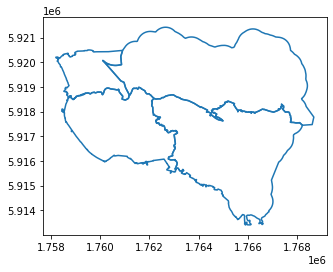

In [13]:
################################
## GeoDataFrame Plot
################################
import matplotlib.pyplot as plt
auckland3.boundary.plot(); # auckland.plot()
plt.show()

In [14]:
################################
## Merge GIS data (auckland3) and Rental data (suburbVsRentPerRoomMean)
################################
auckland = auckland3.merge(suburbVsRentPerRoomMean, left_on='ROUND_NAME', right_on='Suburb')
auckland

,POSTCODE,ROUND_NAME,MAIL_TOWN,geometry,Suburb,RentPerRoom
0,1071,kohimarama,None,"POLYGON ((1768203.160 5917448.262, 1768087.372 5917555.470, 1768057.497 5917...",kohimarama,310.000000
1,1050,remuera,None,"POLYGON ((1763138.678 5917133.816, 1763120.413 5917123.448, 1763101.275 5917...",remuera,260.000000
2,1072,tamaki,None,"POLYGON ((1762187.355 5918537.880, 1762189.523 5918536.130, 1762209.536 5918...",tamaki,340.000000
3,1052,parnell,None,"POLYGON ((1758603.826 5920346.432, 1758604.016 5920346.502, 1758609.920 5920...",parnell,429.431818


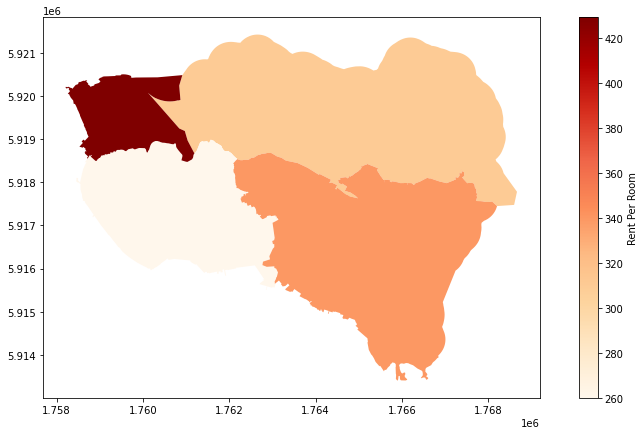

In [15]:
################################
## Plotting Choropleth map using Geopandas
################################

# The variable `auckland` is in type of GeoDataFrame

auckland.plot(column = 'RentPerRoom', # Assign numerical data column
              legend = True, # Decide to show legend or not
              legend_kwds = {'label': "Rent Per Room", 'orientation': "vertical"}, # Name the legend
              cmap='OrRd',
              figsize = [14,7]) 
plt.show()

In [16]:
################################
## TODO: 
## Fetch all suburbs' rental data
## Plot whole map of Auckland
## Make interactive plots with Plotly
################################